In [118]:
import pandas as pd
import numpy as np
from numpy import array, transpose
import CFT_Env_Scipy as CFT_Env
import matplotlib.pyplot as plt
from stable_baselines3.common import results_plotter
from numpy.random import rand
import os

## <font size = '10'> Code for Plotting

In [54]:
def moving_average(values, window):
    """
    Smooth values by doing a moving average
    :param values: (numpy array)
    :param window: (int)
    :return: (numpy array)
    """
    weights = np.repeat(1.0, window) / window
    return np.convolve(values, weights, 'valid')

def plot_results(log_folder, start=0, title='Learning Curve'):
    """
    plot the results

    :param log_folder: (str) the save location of the results to plot
    :param title: (str) the title of the task to plot
    """
    x, y = results_plotter.ts2xy(results_plotter.load_results(log_folder), 'timesteps')
    x=x[start:]
    y=y[start:]
    y = moving_average(y, window=50)
    # Truncate x
    x = x[len(x) - len(y):]

    fig = plt.figure(title)
    plt.plot(x, y)
    plt.xlabel('Number of Timesteps')
    plt.ylabel('Rewards')
    plt.title(title + " Smoothed")
    plt.show()

## <font size = '10'> Ising

<font size = '5'>Training Information

<font size = '4'>

- Guessing Mode Step = 5000
-  Step = 50000
-  Freeze accuracy = 0.001

In [175]:
spec_Ising_analytic = {
    0: [{'Delta': 4, 'C': 2.44141e-4}, {'Delta': 1, 'C': 0.25}],
    2: [{'Delta': 2, 'C': 0.015625}],
    4: [{'Delta': 4, 'C': 2.19727e-4}],
    6: [{'Delta': 6, 'C': 1.36239e-5}],
}


Ising = CFT_Env.CFT_Env(spec_Ising_analytic, spec_Ising_analytic, Del_Ext = 1/8, s_is_t = True)
print(Ising.full_del_c_spec_flat)
print(Ising.full_spin_spec_flat)
print( Ising.Reward(rand(29, 2)) )
print( Ising.Accuracy(rand(29, 2)) )

[4.00000e+00 2.44141e-04 1.00000e+00 2.50000e-01 2.00000e+00 1.56250e-02
 4.00000e+00 2.19727e-04 6.00000e+00 1.36239e-05]
[0 0 2 4 6]
-0.006473442021084916
0.0004101998854187922


In [75]:
Ising_Improv_Hist = pd.read_csv('Ising/Ising_Improve_Hist.csv')
#Ising_Reward_Log = pd.read_csv('Ising/Ising_Monitor1')

In [109]:
Ising_Improv_Hist

,Unnamed: 0,Step,Delta_0_1,C_0_1,Delta_0_2,C_0_2,Delta_2,C_2,Delta_4,C_4,Delta_6,C_6,Reward
0,0,2.0,4.0,0.251913,1.0,1.416261,2.0,0.202941,4.0,0.630707,6.0,0.847116,-5.749748
1,1,3.0,4.0,0.258015,1.0,0.968126,2.0,0.249852,4.0,0.365322,6.0,0.247676,-1.832727
2,2,11.0,4.0,0.197002,1.0,0.000000,2.0,1.303674,4.0,1.049146,6.0,0.000000,-0.828790
3,3,23.0,4.0,0.305702,1.0,0.000000,2.0,1.060074,4.0,0.386711,6.0,0.000000,-0.374193
4,4,64.0,4.0,0.000000,1.0,0.221548,2.0,1.422130,4.0,0.336526,6.0,0.000000,-0.347426
5,5,88.0,4.0,0.895448,1.0,0.491003,2.0,0.000000,4.0,0.000000,6.0,0.000000,-0.101283
6,6,250.0,4.0,0.000000,1.0,0.403066,2.0,0.000000,4.0,0.045526,6.0,0.000000,-0.031174
7,7,279.0,4.0,0.265848,1.0,0.000000,2.0,0.000000,4.0,0.000000,6.0,0.000000,-0.024159
8,8,389.0,4.0,0.000000,1.0,0.996105,2.0,0.000000,4.0,0.000000,6.0,0.000000,-0.012174
9,9,548.0,4.0,0.000000,1.0,0.000000,2.0,0.000000,4.0,0.000000,6.0,0.001947,-0.009329


In [176]:
Ising.full_del_c_spec_flat

array([4.00000e+00, 2.44141e-04, 1.00000e+00, 2.50000e-01, 2.00000e+00,
       1.56250e-02, 4.00000e+00, 2.19727e-04, 6.00000e+00, 1.36239e-05])

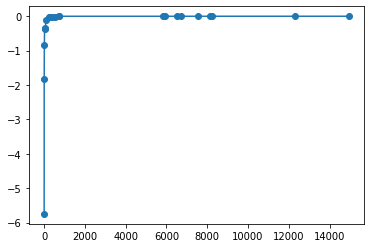

In [29]:
Ising_Improv_Hist_array = array( list( map(lambda x: [x[0], x[1]], list( zip(Ising_Improv_Hist['Step'], Ising_Improv_Hist['Reward']) ) ) ) ).transpose()
plt.plot(Ising_Improv_Hist_array[0], Ising_Improv_Hist_array[1], '-o')

## <font size = '10' >Compact Boson 1

### Analytic

In [173]:
spec_s_1_analytic = { 
    0: [{'Delta': 0.4, 'C': 1}], 
    }
spec_t_1_analytic = { 
    0: [{'Delta': 2, 'C': 1e-2}], 
    1: [{'Delta': 1, 'C': -0.1}],
    2: [{'Delta': 2, 'C': 5e-3}],
    }

Compact_Boson_1 = CFT_Env.CFT_Env(spec_s_1_analytic, spec_t_1_analytic, Del_Ext = 0.1, s_Id = 0)
print(Compact_Boson_1.full_del_c_spec_flat)
print(Compact_Boson_1.full_spin_spec_flat)
print( Compact_Boson_1.Reward(rand(29, 2)) )
print( Compact_Boson_1.Accuracy(rand(29, 2)) )

[ 0.4    1.     2.     0.01   1.    -0.1    2.     0.005]
[0 0 1 2]
-0.11865229837860666
0.0012437567543650912


### Training 1

<font size = '5'>Training Information

<font size = '4'>

-  Guess Mode Step = 7000
-  Step = 100000
-  Freeze accuracy = 0.001

In [119]:
CB1_Improv_Hist_1 = pd.read_csv('Compact_Boson_1/CB_Improve_Hist_v1.csv')

In [149]:
CB_1_Analytic_State = dict(zip([
    'Step', 
    'Delta_s_0', 'C_s_0',
    'Delta_t_0', 'C_t_0', 'Delta_t_1', 'C_t_1', 'Delta_t_2', 'C_t_2',
    'Reward'
    ], ['-'] + list(Compact_Boson_1.full_del_c_spec_flat) + ['-']))
CB1_Improv_Hist_1_tmp = CB1_Improv_Hist_1.append(CB_1_Analytic_State, ignore_index=True)

In [150]:
print( f'Analytic_Spectrum: {Compact_Boson_1.full_del_c_spec_flat}, Analytic_Reward(Rescaled): {0.005 * Compact_Boson_1.Reward(rand(30, 2)):.6f}, Analytic Accuracy: {Compact_Boson_1.Accuracy(rand(30, 2)):.6f}' )
CB1_Improv_Hist_1_tmp

Analytic_Spectrum: [ 0.4    1.     2.     0.01   1.    -0.1    2.     0.005], Analytic_Reward(Rescaled): -0.000671, Analytic Accuracy: 0.003075


,Unnamed: 0,Step,Delta_s_0,C_s_0,Delta_t_0,C_t_0,Delta_t_1,C_t_1,Delta_t_2,C_t_2,Reward
0,0.0,2.0,0.4,2.000000,2.0,-0.160501,1.0,-0.195285,2.0,0.684432,-0.044235
1,1.0,7.0,0.4,2.000000,2.0,-0.062675,1.0,-0.148836,2.0,0.589539,-0.039455
2,2.0,9.0,0.4,2.000000,2.0,1.181690,1.0,-1.000000,2.0,0.320388,-0.027143
3,3.0,10.0,0.4,2.000000,2.0,0.287195,1.0,0.145990,2.0,-0.067241,-0.013872
4,4.0,125.0,0.4,1.150526,2.0,0.662857,1.0,-0.622520,2.0,0.109204,-0.010199
5,5.0,7701.0,0.4,0.905654,2.0,0.226492,1.0,0.038655,2.0,-0.050648,-0.008289
6,6.0,17576.0,0.4,0.784821,2.0,-0.092346,1.0,0.037427,2.0,-0.067144,-0.005584
7,7.0,23449.0,0.4,0.884213,2.0,-0.280909,1.0,0.147644,2.0,-0.068063,-0.005518
8,8.0,27752.0,0.4,0.478164,2.0,0.107386,1.0,-0.637488,2.0,0.169789,-0.005413
9,9.0,29589.0,0.4,0.862888,2.0,0.301364,1.0,-0.277599,2.0,-0.026605,-0.005151


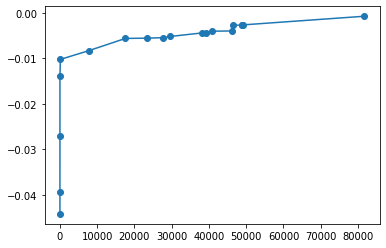

In [113]:
CB1_Improv_Hist_array_1 = array( list( map(lambda x: [x[0], x[1]], list( zip(CB1_Improv_Hist_1['Step'], CB1_Improv_Hist_1['Reward']) ) ) ) ).transpose()
plt.plot(CB1_Improv_Hist_array_1[0], CB1_Improv_Hist_array_1[1], '-o')

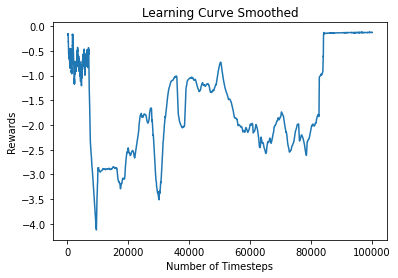

In [110]:
plot_results('Compact_Boson_1/CB_1_All_Rew_1')

### Training 2

<font size = '5'>Training Information

<font size = '4'>

-  Reward Scale = 0.005
-  Guess Mode Step = 7000
-  Step = 1000000
-  Freeze accuracy = 0.001
-  Floor = -1

In [108]:
CB1_Improv_Hist_2 = pd.read_csv('Compact_Boson_1/CB_Improve_Hist_v2.csv')

In [174]:
CB1_Improv_Hist_2_tmp = CB1_Improv_Hist_2.append(CB_1_Analytic_State, ignore_index=True)
CB1_Improv_Hist_2_tmp

,Unnamed: 0,Step,Delta_s_0,C_s_0,Delta_t_0,C_t_0,Delta_t_1,C_t_1,Delta_t_2,C_t_2,Reward
0,0.0,2.0,0.4,1.820826,2.0,0.096949,1.0,2.000000,2.0,-0.007689,-0.092436
1,1.0,3.0,0.4,-0.672275,2.0,0.614071,1.0,1.534044,2.0,-0.874300,-0.058717
2,2.0,19.0,0.4,-0.486036,2.0,1.327874,1.0,0.508719,2.0,-0.889679,-0.042561
3,3.0,23.0,0.4,-0.394347,2.0,0.563414,1.0,0.525086,2.0,-0.605133,-0.036472
4,4.0,44.0,0.4,-0.585421,2.0,0.554846,1.0,0.036764,2.0,-0.245162,-0.032163
5,5.0,77.0,0.4,0.770611,2.0,0.155014,1.0,1.060510,2.0,-0.346563,-0.031839
6,6.0,96.0,0.4,0.679729,2.0,0.813871,1.0,0.006959,2.0,-0.420435,-0.018773
7,7.0,19581.0,0.4,1.067564,2.0,-0.047978,1.0,0.218667,2.0,-0.245586,-0.017906
8,8.0,19658.0,0.4,1.749356,2.0,0.253281,1.0,0.645463,2.0,-0.426545,-0.015192
9,9.0,20830.0,0.4,-0.316383,2.0,0.263357,1.0,-1.000000,2.0,0.121165,-0.012931


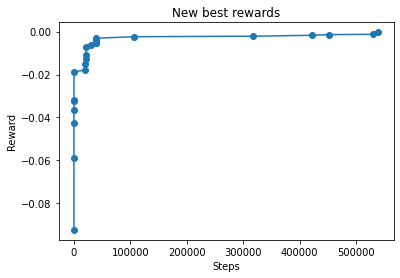

In [162]:
CB1_Improv_Hist_array_2 = array( list( map(lambda x: [x[0], x[1]], list( zip(CB1_Improv_Hist_2['Step'], CB1_Improv_Hist_2['Reward']) ) ) ) ).transpose()
plt.plot(CB1_Improv_Hist_array_2[0], CB1_Improv_Hist_array_2[1], '-o')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('New best rewards')
plt.show()

In [166]:
s_best = list(CB1_Improv_Hist_2_tmp.iloc[-2, 2:10])
s_analytic = list(CB1_Improv_Hist_2_tmp.iloc[-1, 2:10])
s_closest = list(CB1_Improv_Hist_2_tmp.iloc[-5, 2:10])
Compact_Boson_1_best = CFT_Env.CFT_Env(spec_s_1_analytic, spec_t_1_analytic, Del_Ext = 0.1, s_Id = 0)
Compact_Boson_1_best.Update_Spec_with_new_spec(array(s_best))
Compact_Boson_1_closest = CFT_Env.CFT_Env(spec_s_1_analytic, spec_t_1_analytic, Del_Ext = 0.1, s_Id = 0)
Compact_Boson_1_closest.Update_Spec_with_new_spec(array(s_closest))

In [171]:
pts_tmp = rand(29, 2)
print(Compact_Boson_1_best.Reward(pts_tmp))
print(Compact_Boson_1.Reward(pts_tmp))
print(Compact_Boson_1_closest.Reward(pts_tmp))

-0.0627727428061347
-0.08505766161745963
-0.34513831899752445


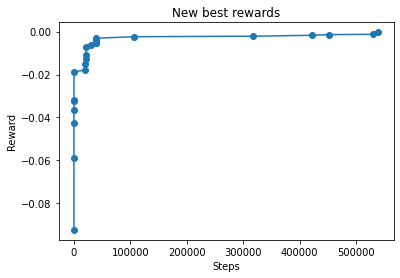

In [133]:
CB1_Improv_Hist_array_2 = array( list( map(lambda x: [x[0], x[1]], list( zip(CB1_Improv_Hist_2['Step'], CB1_Improv_Hist_2['Reward']) ) ) ) ).transpose()
plt.plot(CB1_Improv_Hist_array_2[0], CB1_Improv_Hist_array_2[1], '-o')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('New best rewards')
plt.show()

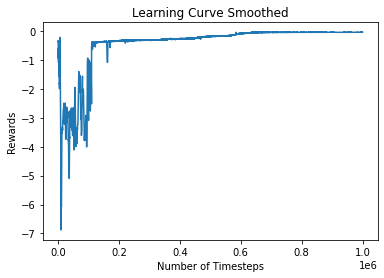

In [112]:
plot_results('Compact_Boson_1/CB_1_All_Rew_2')

## <font size = '10'>Compact Boson 2

### Analytic

In [124]:
spec_s_2_analytic = { 
    0: [{'Delta': 0.4, 'C': 1}], 
    2: [{'Delta': 2.4, 'C': 3.57143e-3}],
    3: [{'Delta': 3.4, 'C': 0}]
    }
spec_t_2_analytic = { 
    0: [{'Delta': 2, 'C': 1e-2}], 
    1: [{'Delta': 1, 'C': -0.1}, {'Delta': 3, 'C': -5e-4}],
    2: [{'Delta': 2, 'C': 5e-3}],
    3: [{'Delta': 3, 'C': -1.66667e-4}]
    }

Compact_Boson_2 = CFT_Env.CFT_Env(spec_s_2_analytic, spec_t_2_analytic, Del_Ext = 0.1, s_Id = 0)
print( Compact_Boson_2.full_del_c_spec_flat )
print( Compact_Boson_2.full_spin_spec_flat )
print( Compact_Boson_2.Reward(rand(30, 2)) )
print( Compact_Boson_2.Accuracy(rand(30, 2)) )

[ 4.00000e-01  1.00000e+00  2.40000e+00  3.57143e-03  3.40000e+00
  0.00000e+00  2.00000e+00  1.00000e-02  1.00000e+00 -1.00000e-01
  3.00000e+00 -5.00000e-04  2.00000e+00  5.00000e-03  3.00000e+00
 -1.66667e-04]
[0 2 3 0 1 1 2 3]
-0.0686755677567148
0.0004499579538897574


### Training

<font size = '5'>Training Information

<font size = '4'>

-  Reward Scale = 0.005
-  Guess Mode Step = 7000
-  Step = 1000000
-  Freeze accuracy = 0.001
-  Floor = -1

In [142]:
CB2_Improv_Hist = pd.read_csv('Compact_Boson_2/CB_Improve_Hist.csv')

In [143]:
CB_2_Analytic_State = dict(zip([
    'Step', 
    'Delta_s_0', 'C_s_0', 'Delta_s_2', 'C_s_2', 'Delta_s_3', 'C_s_3', 
    'Delta_t_0', 'C_t_0', 'Delta_t_1_1', 'C_t_1_1', 'Delta_t_1_2', 'C_t_1_2', 'Delta_t_2', 'C_t_2', 'Delta_t_3', 'C_t_3', 
    'Reward'
    ], ['-'] + list(Compact_Boson_2.full_del_c_spec_flat) + ['-']))
CB2_Improv_Hist_tmp = CB2_Improv_Hist.append(CB_2_Analytic_State, ignore_index=True)

In [144]:
CB2_Improv_Hist_tmp

,Unnamed: 0,Step,Delta_s_0,C_s_0,Delta_s_2,C_s_2,Delta_s_3,C_s_3,Delta_t_0,C_t_0,Delta_t_1_1,C_t_1_1,Delta_t_1_2,C_t_1_2,Delta_t_2,C_t_2,Delta_t_3,C_t_3,Reward
0,0.0,11.0,0.4,0.613378,2.4,1.387874,3.4,-0.147580,2.0,-0.008002,1.0,0.688233,3.0,0.061381,2.0,1.547986,3.0,0.560359,-0.323603
1,1.0,13.0,0.4,1.759138,2.4,0.392393,3.4,-0.097567,2.0,-0.677276,1.0,1.011780,3.0,0.593921,2.0,1.414930,3.0,-0.350202,-0.145674
2,2.0,17.0,0.4,0.429091,2.4,0.987793,3.4,-0.165761,2.0,0.015745,1.0,-0.195803,3.0,1.188841,2.0,0.295600,3.0,-0.499709,-0.108489
3,3.0,25.0,0.4,-0.041706,2.4,0.138700,3.4,-0.061390,2.0,0.328085,1.0,0.157094,3.0,0.026743,2.0,-0.045027,3.0,-0.496774,-0.087428
4,4.0,37.0,0.4,1.589062,2.4,0.010476,3.4,0.204684,2.0,0.492298,1.0,0.059073,3.0,-0.693261,2.0,1.929690,3.0,-0.444646,-0.079987
5,5.0,6568.0,0.4,1.248008,2.4,0.553562,3.4,-0.352027,2.0,0.685898,1.0,0.795772,3.0,0.493201,2.0,0.200382,3.0,-0.578566,-0.075827
6,6.0,6584.0,0.4,0.919545,2.4,0.452002,3.4,-0.228763,2.0,0.697340,1.0,-0.472659,3.0,0.925955,2.0,0.011871,3.0,-0.373707,-0.069816
7,7.0,6715.0,0.4,1.387159,2.4,0.961863,3.4,-0.263578,2.0,0.963169,1.0,-0.111265,3.0,0.175648,2.0,1.308311,3.0,-0.659250,-0.064922
8,8.0,6750.0,0.4,1.264672,2.4,0.932031,3.4,-0.416226,2.0,0.622801,1.0,-0.467867,3.0,-0.283127,2.0,2.745003,3.0,-1.000000,-0.0524
9,9.0,7485.0,0.4,0.311017,2.4,0.478223,3.4,-0.249500,2.0,0.334971,1.0,-1.000000,3.0,0.096088,2.0,1.492840,3.0,-0.436462,-0.046878


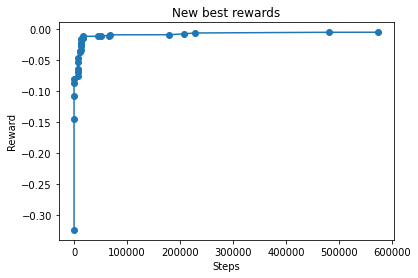

In [146]:
CB2_Improv_Hist_array = array( list( map(lambda x: [x[0], x[1]], list( zip(CB2_Improv_Hist['Step'], CB2_Improv_Hist['Reward']) ) ) ) ).transpose()
plt.plot(CB2_Improv_Hist_array[0], CB2_Improv_Hist_array[1], '-o')
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('New best rewards')
plt.show()

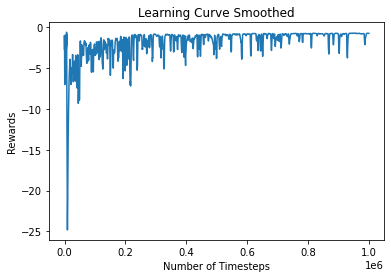

In [145]:
plot_results('Compact_Boson_2/CB2_All_Rew')